In [89]:
import recipe
import db
import svd

import matplotlib.pyplot as plt
import pandas as pd

In [90]:
data = recipe.load_recipe(n = 150000)
data2 = recipe.recipe_preprocessing(data)
data3 = recipe.split_ingredient(data2)
data4 = recipe.process_ingredient(data3)

100%|██████████| 141523/141523 [00:37<00:00, 3777.85it/s]


In [187]:
im, nm = svd.two_matrix(n = 10000)

100%|██████████| 9394/9394 [00:07<00:00, 1339.34it/s]


칼럼 수 변화: 7080 -> 5439
행의 수 변화: 9394 -> 9394
칼럼 수 변화: 176 -> 170
행의 수 변화: 9394 -> 9394
ingred matrix saved
nutrition matrix saved


im

In [188]:
im = pd.read_csv(r'matrix/ingred__10000.csv')

In [192]:
ingre = pd.read_csv('ingre_50up.csv')


In [223]:
col_50 = ["recipe_title"]+ list(set(im.columns).intersection(set(ingre["index"])))

In [224]:
im2 = im.loc[:, col_50].copy()

In [246]:
d1 = im2.iloc[:,:1] # 타이틀
d2 = im2.iloc[:, 1:].apply(lambda x: x/max(x), axis = 0) # 정규화
input = pd.concat([d1, d2], axis= 1)

In [244]:
input2 = input.loc[:, (input != 0.0).sum() >1] # 한번 이상 등장한 값으로 

In [267]:
title_recipe, recipe_vec, ingredient_vec = svd.matrix_decomposition(input)

9394개의 레시피, 1274개의 식재료 -> 100차원으로 재표현 완료


In [294]:
from scipy.sparse.linalg import svds
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

sim_recipe = cosine_similarity(recipe_vec , recipe_vec)


In [306]:
recipe_similarity = pd.DataFrame(sim_recipe, columns=list(input.recipe_title))

In [314]:
recipe_similarity.loc[0].sort_values(ascending= False)

호박 새우젓찌개 만드는 방법~★                                                  1.000000
들기름두부찌개! 가성비 최고의 음식, 맛도 최고!                                        0.991880
[해외자취Cook.feel通]240. 연두 감자맑은국 레시피 <연두활용요리 9탄>                      0.991854
김치만두전골                                                             0.991747
돌나물사과무침                                                            0.991736
                                                                     ...   
건새우볶음                                                             -0.117808
봄의 기운을 이렇게 가득 담았다고? 춘곤증도 날아가는 봄 기력 충전 레시피 새콤향긋 이렇게 쉬운 <주꾸미달래무침>   -0.117842
베트남요리 월남쌈                                                         -0.120959
건새우를 넣은 마늘쫑 볶음                                                    -0.123580
건새우 마늘쫑볶음                                                         -0.136205
Name: 0, Length: 9394, dtype: float64

In [327]:
recipe_similarity.loc[0].sort_values(ascending= False)

호박 새우젓찌개 만드는 방법~★                                                  1.000000
들기름두부찌개! 가성비 최고의 음식, 맛도 최고!                                        0.991880
[해외자취Cook.feel通]240. 연두 감자맑은국 레시피 <연두활용요리 9탄>                      0.991854
김치만두전골                                                             0.991747
돌나물사과무침                                                            0.991736
                                                                     ...   
건새우볶음                                                             -0.117808
봄의 기운을 이렇게 가득 담았다고? 춘곤증도 날아가는 봄 기력 충전 레시피 새콤향긋 이렇게 쉬운 <주꾸미달래무침>   -0.117842
베트남요리 월남쌈                                                         -0.120959
건새우를 넣은 마늘쫑 볶음                                                    -0.123580
건새우 마늘쫑볶음                                                         -0.136205
Name: 0, Length: 9394, dtype: float64

In [324]:
input.title

'들기름두부찌개! 가성비 최고의 음식, 맛도 최고!'

In [322]:
input.iloc[input.title == '들기름두부찌개! 가성비 최고의 음식, 맛도 최고!', :]

ValueError: Location based indexing can only have [integer, integer slice (START point is INCLUDED, END point is EXCLUDED), listlike of integers, boolean array] types

In [280]:
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

sim = cosine_similarity(ingredient_vec , ingredient_vec)


TypeError: cosine_similarity() got an unexpected keyword argument 'cmap'

In [286]:
list(input.columns)[1:]

['육수용멸치',
 '꿀',
 '미역',
 '다진김치',
 '아욱',
 '양파가루',
 '통조림옥수수',
 '아몬드분말',
 '로메인상추',
 '생굴',
 '건고추',
 '바닐라에센스',
 '인스턴트사골곰탕',
 '빵가루',
 '돼지앞다리살',
 '소고기양지',
 '땅콩분태',
 '2배식초',
 '노른자',
 '곰취',
 '우엉',
 '바닐라오일',
 '젤라틴',
 '크래미',
 '유기농설탕',
 '더덕',
 '다진파',
 '황태포',
 '뷰코코코넛밀크프리미엄',
 '밀가루강력분',
 '북어채',
 '부추',
 '술',
 '비빔면',
 '콜리플라워',
 '불린미역',
 '계란흰자',
 '멸치다시마육수',
 '베트남고추',
 '차가운버터',
 '멸치액젓',
 '사이다',
 '체다치즈',
 '미숫가루',
 '깐마늘',
 '연어캔',
 '양파반개',
 '백설안달루시아산올리브유',
 '한천가루',
 '월계수',
 '라임',
 '메밀국수',
 '다시마',
 '통조림햄',
 '빨강파프리카',
 '열무',
 '즉석밥',
 '샐러드용채소',
 '호두',
 '스파게티',
 '소불고기',
 '옥수수가루',
 '우삼겹',
 '닭안심',
 '자반고등어',
 '삶은달걀',
 '돈까스',
 '양파작은것',
 '청홍고추',
 '애느타리버섯',
 '흑임자',
 '소고기국거리',
 '고추참치',
 '인절미',
 '대패삼겹살',
 '강력분',
 '골뱅이',
 '오리훈제',
 '시리얼',
 '식은밥',
 '초록파프리카',
 '떡',
 '산딸기',
 '설탕',
 '돈가스소스',
 '아가베시럽',
 '호박고구마',
 '무청시래기',
 '소세지',
 '참나물',
 '소고기안심',
 '핫케이크믹스',
 '다진쇠고기',
 '감자전분가루',
 '바나나',
 '쌀떡',
 '쭈꾸미',
 '매운고춧가루',
 '실곤약',
 '밀가루중력분',
 '항정살',
 '굵은고춧가루',
 '고추장아찌',
 '순대',
 '흰대파',
 '쥐똥고추',
 '데친시금치',
 '달걀후라이',
 '생연어',
 '배추잎',
 '펜네',


In [287]:
# 데이터프레임 생성
ingre_similarity = pd.DataFrame(sim, columns=list(input.columns)[1:])

In [293]:
similarity.loc[0].sort_values()

양파가루    -0.908390
꿀       -0.774900
소금살짝    -0.370183
양송이     -0.367533
양파껍질    -0.330774
           ...   
숙주       0.461768
아몬드분말    0.551821
김치       0.699780
아욱       0.928475
육수용멸치    1.000000
Name: 0, Length: 1274, dtype: float64

In [ ]:



# 'Similarity' 열을 기준으로 내림차순 정렬
sorted_df = similarity.sort_values(by='Similarity', ascending=False)
# df는 데이터프레임 객체, 'Similarity'는 컬럼명으로 가정합니다.
indexes = sorted_df.index.tolist()

<Axes: >

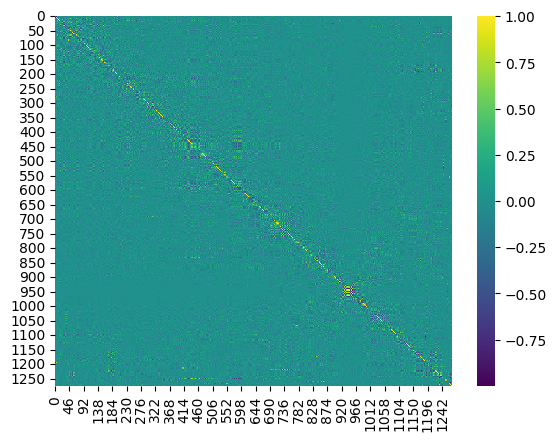

In [281]:
sns.heatmap(sim, cmap='viridis')

In [ ]:
tsne.fit_transform(recipe_vec)

In [ ]:


TSNE(recipe_vec)

In [250]:
list(input.columns), 

Index(['recipe_title', '육수용멸치', '꿀', '미역', '다진김치', '아욱', '양파가루', '통조림옥수수',
       '아몬드분말', '로메인상추',
       ...
       '미트볼', '김밥', '조청', '양송이', '표고버섯', '건새우가루', '어간장', '꽃빵', '우스터소스',
       '천연조미료'],
      dtype='object', length=1275)

In [255]:
title = list(input.columns)
ingredient_vec


dict = {a:b for a, b in zip(title[1:], ingredient_vec)}

In [ ]:
recipe = {a:b for a, b in zip(title[1:], ingredient_vec)}

import pickle
with open("vector/ingre_vec_10000.pkl", "wb") as f:
    pickle.dump(dict, f)

In [261]:
import pickle
with open("vector/ingre_vec_10000.pkl", "wb") as f:
    pickle.dump(dict, f)

In [91]:
def extract_columns_with_patterns(dataframe, patterns, num_columns):
    selected_columns = [f"{pattern}{i}" for i in range(1, num_columns + 1) for pattern in patterns]
    result_df = dataframe[selected_columns]
    return result_df
# 'ingredient', 'quantity', 'unit' 패턴의 열만 추출 (총 25개씩)
result_df = extract_columns_with_patterns(data4, ['ingredient', 'quantity', 'unit'], 25)
# recipe_title 뽑아서 합치기
title = data4['recipe_title']
last = pd.concat([title, result_df], axis=1)
last

,recipe_title,ingredient1,quantity1,unit1,ingredient2,quantity2,unit2,ingredient3,quantity3,unit3,...,unit22,ingredient23,quantity23,unit23,ingredient24,quantity24,unit24,ingredient25,quantity25,unit25
0,호박 새우젓찌개 만드는 방법~★,둥근호박,1,개,청양고추,3,개,당근,,약간,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,바글바글 전복 된장찌개,된장,1,스푼,전복,,None,양파,1/2,개,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,순두부찌개....오도독 씹히는 미더덕이 들어간 순두부찌개!!,순두부,,None,바지락,30,g,미더덕,30,g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,정통 바지락 순두부 찌개,순두부,1,봉,바지락,100,g,양파,50,g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,크림토마토 비프 스튜,쇠고기등심,250,g,파프리카,1,개,양파,1/3,개,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,꽃 요리 아카시아꽃 튀김 향긋한 튀김,아카시아꽃,10,송이,전분가루,2,Ts,밀가루,4,Ts,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149996,"달콤한 사과와 바삭한 파이의 환상 궁합, 사과 파이",중력분,225,g,설탕,1,T과,소금,,약간,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149997,고구마치즈롤 고구마치즈스틱 고구마 요리 견과류도 넣었어요.,고구마,1,개,라이스페이퍼,10,장,견과류취향껏,,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149998,치즈 폭탄 등갈비 레시피,등갈비,1.3,kg,치즈원하는만큼,,None,소주,2,t,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [148]:

data = last.iloc[:10000] # 데이터 10000개 사용
data.index = range(len(data)) # 인덱스 리셋

In [151]:
recipe.recipe_food_matrix(data)

KeyError: 'ingredient26'

In [150]:
svd.matrix_decomposition(data)

ValueError: object arrays are not supported